In [10]:
import pandas as pd

""""Для быстрого и корректного отображения графиков, которые мы будем строить, запустите следующую команду. 
Она позволит автоматически выводить на экран все графики и диаграммы без использования дополнительных функций."""
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings; warnings.simplefilter('ignore') #предупреждения не являются сообщениями об ошибках, их можно игнорировать и отключить выведение на экран:

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df = pd.read_csv('tips.csv')

In [7]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df.total_bill.max()

50.81

<AxesSubplot:>

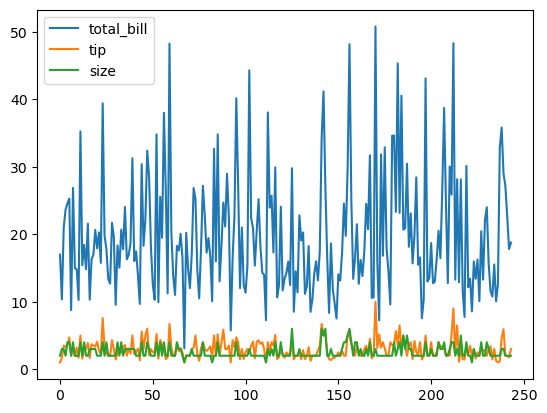

In [12]:
df.plot()

<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>

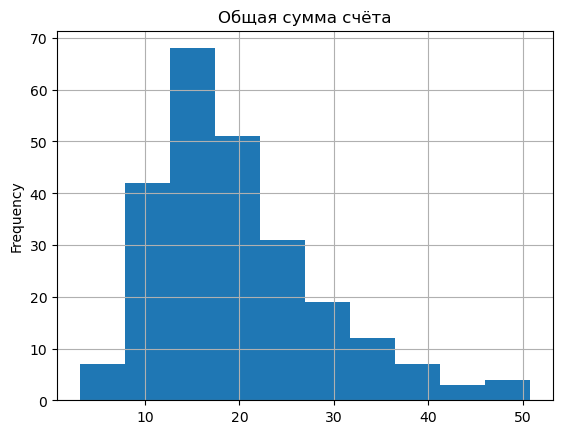

In [14]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

<AxesSubplot:title={'center':'number of visitors'}>

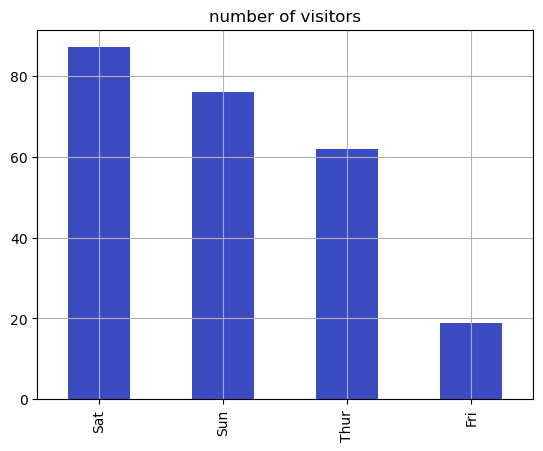

In [23]:
df.day.value_counts().plot(kind = 'bar',
                          grid = True,
                          colormap = 'coolwarm',
                          title = 'number of visitors')

In [28]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean()

sex     smoker
Female  No        2.773519
        Yes       2.931515
Male    No        3.113402
        Yes       3.051167
Name: tip, dtype: float64

array([<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Сумма чаевых'}, ylabel='Frequency'>],
      dtype=object)

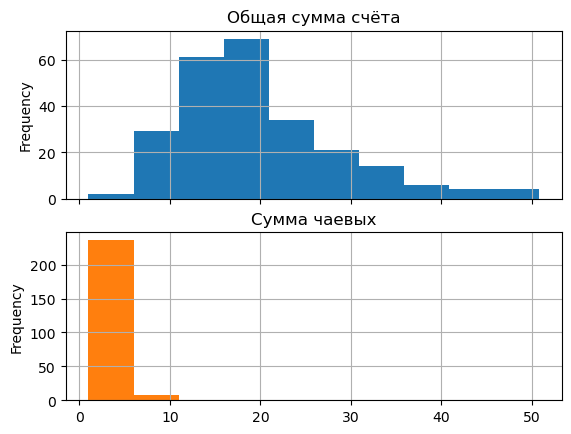

In [29]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True,  #True можно разместить несколько графиков в одной рабочей области
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

<AxesSubplot:title={'center':'Общая сумма счёта Vs сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

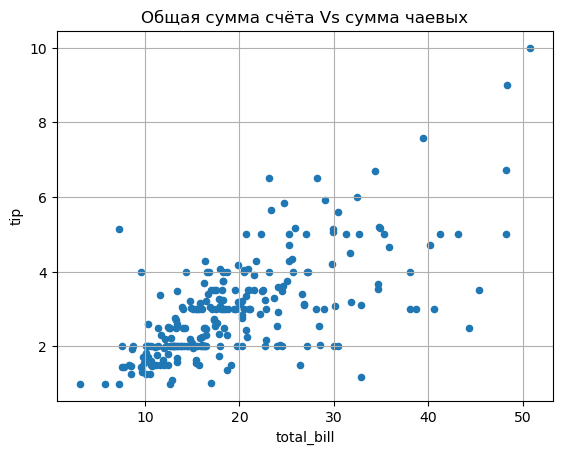

In [30]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter',  #связь между суммой по счёту и суммой чаевых.
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

<AxesSubplot:xlabel='day'>

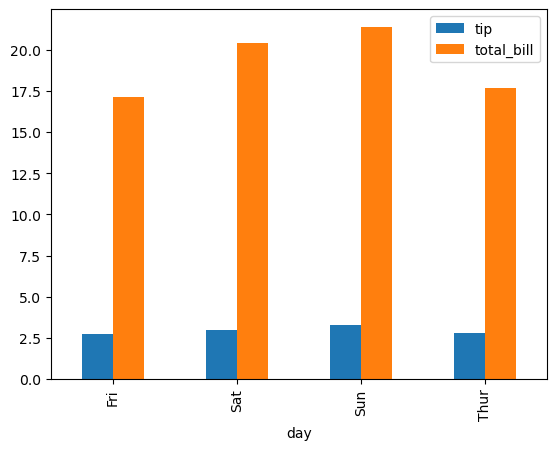

In [31]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

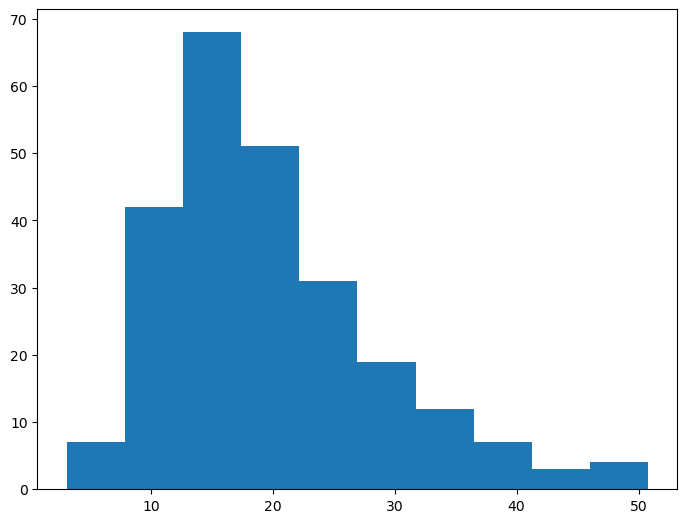

In [35]:
fig = plt.figure() # оздаётся объект с именем fig,
axes = fig.add_axes([0, 0, 1, 1]) # создаётся координатная плоскость (axes),
axes.hist(df['total_bill'])

In [37]:
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()
bills_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


<BarContainer object of 4 artists>

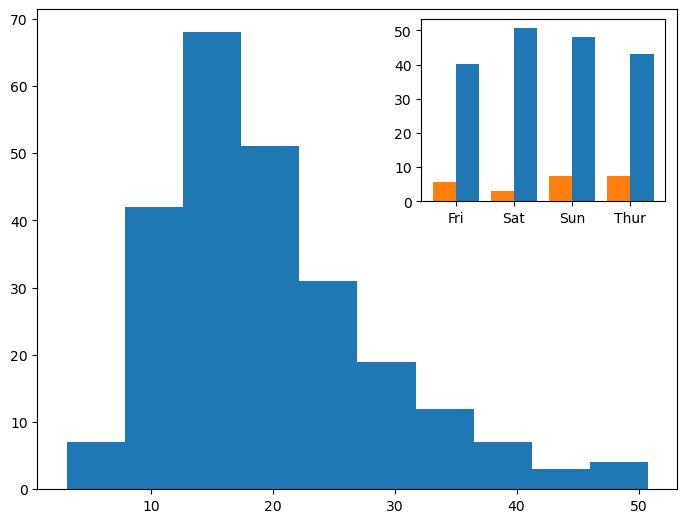

In [41]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge') #align указывает, следует ли размещать столбцы для отображения каждого значения в центре или необходимо сместить их к краю.
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge') #width мы задаём ширину столбца в долях единицы относительно ширины всего пространства, выделенного для данного столбца.


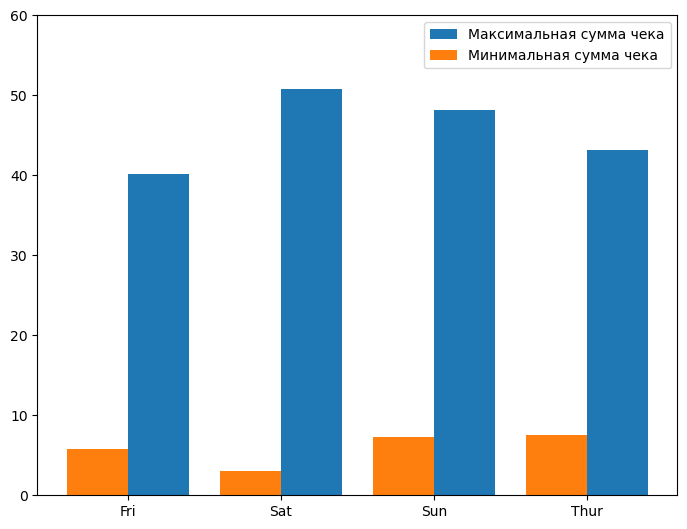

In [49]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60) #увеличиваем максимальное значение оси ординат
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

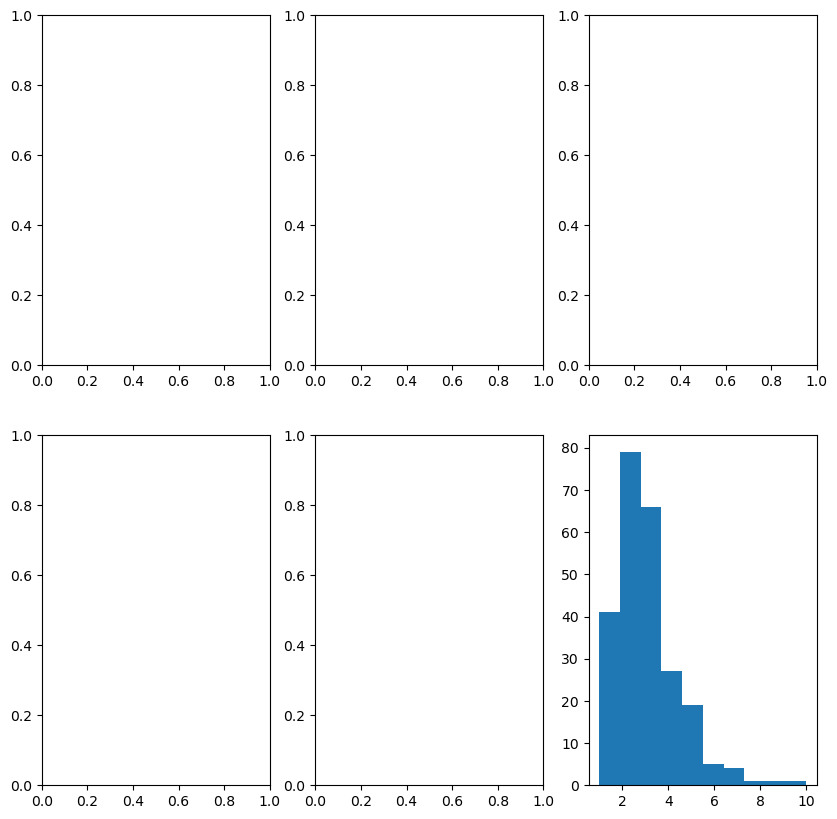

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(10,10)) 
axes[1][2].hist(df['tip']) 

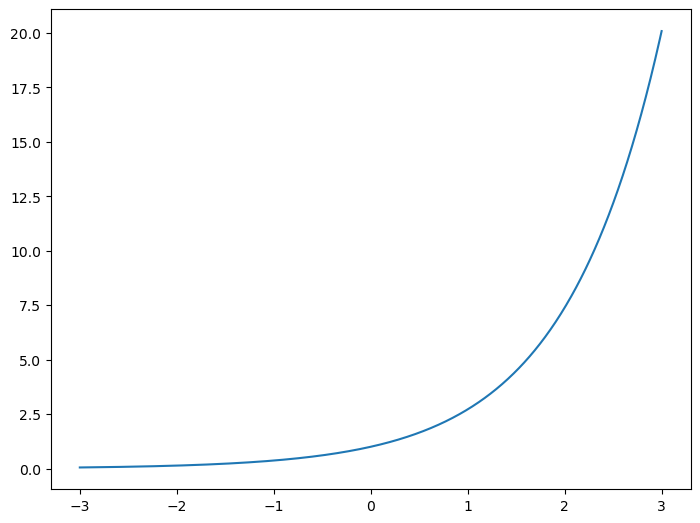

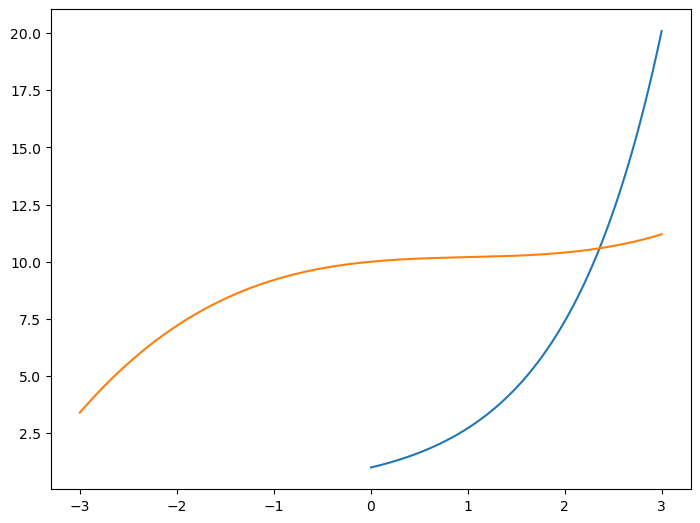

In [61]:
x = np.linspace(start=-3., stop=3., num=1000) #генерируем массив из 1000 чисел, равномерно распределённых в интервале от -3 до 3.
y1 = np.exp(x)
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1)

y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

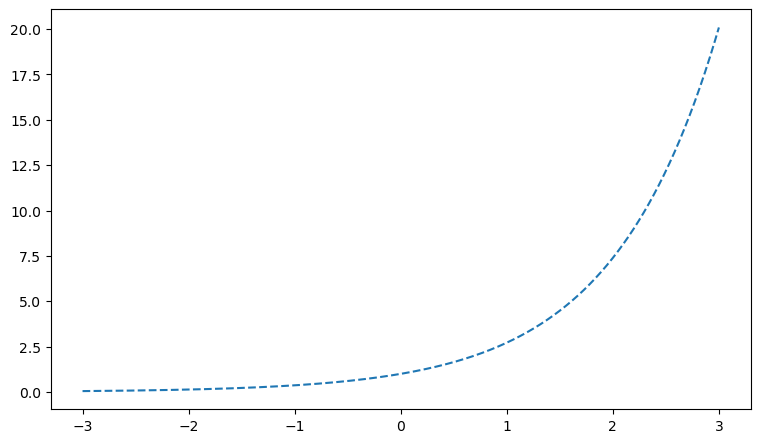

In [65]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')

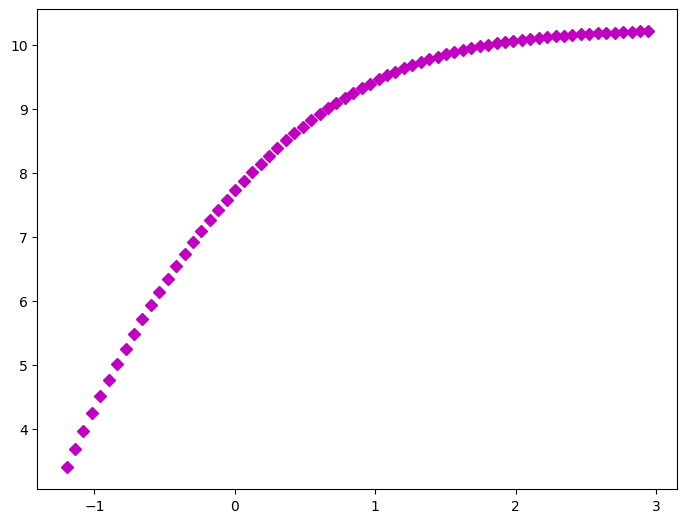

In [73]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[300::10], y2[:700:10], 'mD') #линию в фиолетовом цвете ('m' — magenta) с маркером ромба ('D' — diamond marker):

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

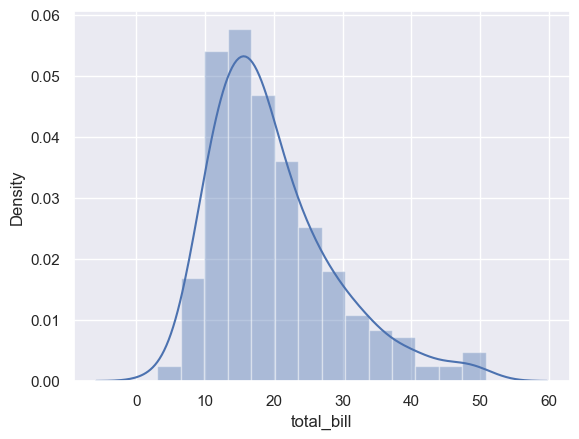

In [78]:
sns.set()


sns.distplot(df['total_bill'])

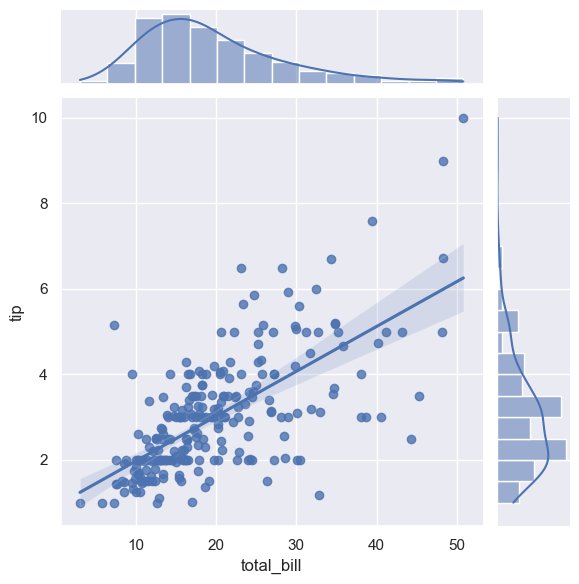

In [81]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')

<AxesSubplot:xlabel='day', ylabel='tip'>

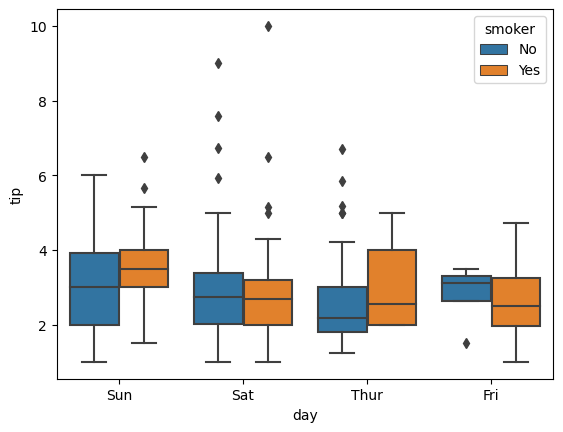

In [3]:
sns.boxplot(x = 'day', y = 'tip', data = df, hue = 'smoker')

In [5]:
correlation = df.corr()
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

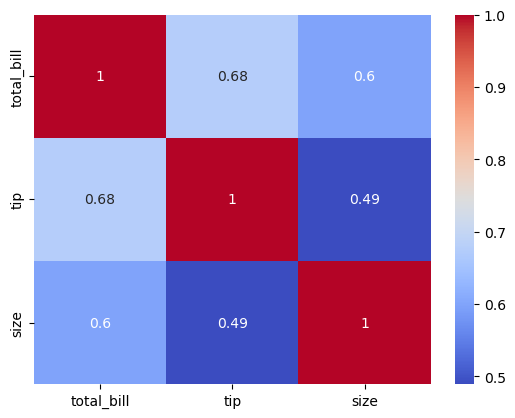

In [7]:
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [9]:
!pip install plotly
!pip install cufflinks

     ---------------------------------------- 81.7/81.7 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68718 sha256=e2f381f5a11e4a9e9ae759b338fb53f9eb1b43dc4ae3cb635c05e68d01e4e021
  Stored in directory: c:\users\tom\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [11]:
init_notebook_mode(connected = True) #Для работы с библиотекой Plotly в режиме оффлайн включите этот режим:
cf.go_offline()

In [12]:
df.iplot()